# Problema 4
## Sebastian Ramirez Escobar
## Sebastian Carvalho Salazar
## Johan Stiven Paez Bermudez

### Descripción del problema:
1. Sea $ Hn(i, j) = 1/i+j−1 $, llamada la matriz de Hilbert. Simule 1000 datos normales con matriz de covarianza Hn. Estime la matriz de covarianzas desde los datos simulados. Realice una gráfica de n en el eje x con el número condición de la matriz de covarianza estimada en el eje y. Recuerde que el número de condición es $$∥A∥∥A−1∥$$  ¿Que tipo de comportamiento observa?
2. a. Considere $x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]$. Defina $b = H15x$ y resuelva numéricamente el sistema con la forma $x = H−1$
b. ¿Qué conclusión obtiene? Busque alternativas para resolver el problema observado

## 1. Aproximación 1 - Numpy



Text(0, 0.5, 'Número de condición')

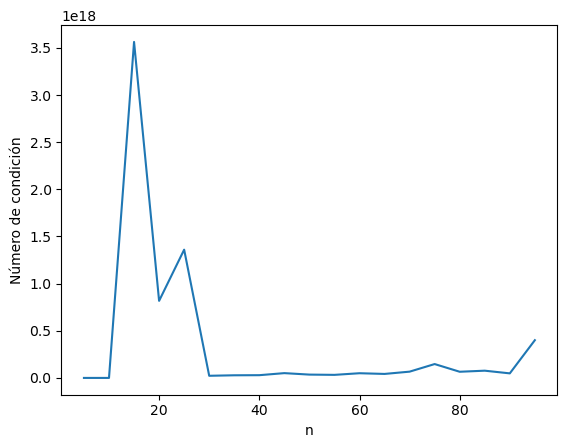

In [1]:
#Importar librerías
import numpy as np
import matplotlib.pyplot as plt

# 1. Matriz de Hilbert
def hilbert_np(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i,j] = 1 / (i + j + 1)
    return H

# 2. Simular datos normales    
def simulador_datos(n):
    H = hilbert_np(n)
    return np.random. multivariate_normal(np.zeros(n), H, size=1000)

# 3. Estimar matriz de covarianza
def estimar_covarianza(X):
    return np.cov(X.T)

# 4. Graficar número de condición
ns = range(5, 100, 5) # Rango de las matrices de tamaño (2x2, 3x3, ..., 100x100)
conds = []

for n in ns:
    X = simulador_datos(n)
    C = estimar_covarianza(X)
    conds.append(np.linalg.cond(C))
    
plt.plot(ns, conds)
plt.xlabel('n')
plt.ylabel('Número de condición')

### 2.1 Alternativas para resolver H15 (numpy)

In [53]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

H = hilbert_np(15) 

b = H @ x

x_estimated = np.linalg.inv(H) @ b

print(x_estimated)

[-2.89895577e+01  1.69539124e+02 -1.04917188e+03  3.67925000e+03
 -1.59450000e+03 -1.21960000e+04  2.36470000e+04 -1.85040000e+04
  6.48800000e+03  3.20000000e+02 -1.15200000e+03  5.12000000e+02
  3.20000000e+01  0.00000000e+00  1.20000000e+01]


In [54]:
U, s, Vh = np.linalg.svd(H)
x_estimated_sol = Vh.T @ np.linalg.inv(np.diag(s)) @ U.T @ b
print(x_estimated_sol)

[  0.99999952   1.99984741   2.99804688   4.03125      6.5625
   3.75         2.25        28.          56.         -80.
  64.         -32.          48.         -16.          15.        ]


## 2. Aproximación 2 - SciPy (Comprobación)

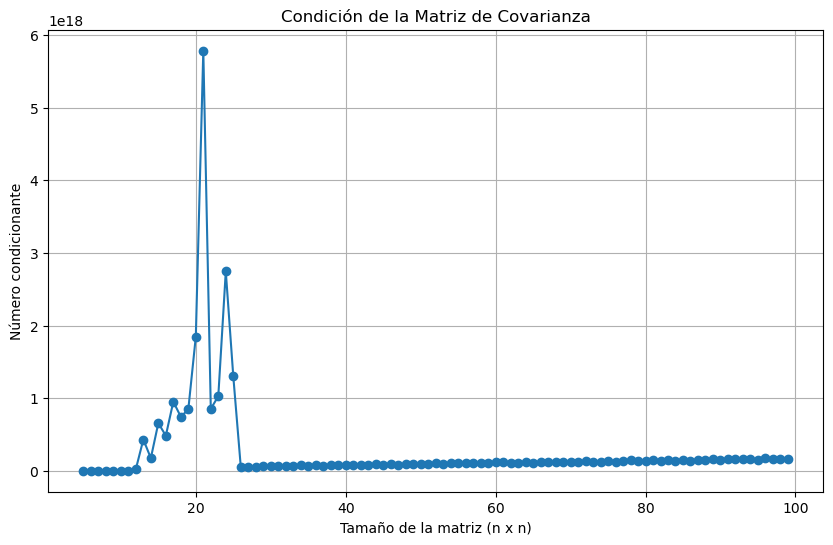

In [6]:
from scipy.linalg import hilbert, inv, norm

# Crear Matriz Hilbert tamaño n
def hilbert_sp(n):
    Hn = hilbert(n)
    return Hn

n_values = range(5, 100)  # Rango de las matrices de tamaño (2x2, 3x3, ..., 100x100)

# guardar los numers condiciones
condition_numbers = []

for n in n_values:
    # Crear matriz de hilbert
    Hn = hilbert_sp(n)

    # Simular 1000 puntos con la  matrix Hn
    np.random.seed(0)
    sample_size = 1000
    data = np.random.multivariate_normal(np.zeros(n), Hn, sample_size)

    # Estimar la matriz de covarianza np
    estimated_covariance = np.cov(data, rowvar=False)

    # Calcular la condición de la matriz de covarianza estimada
    condition_number = norm(estimated_covariance) * norm(inv(estimated_covariance))

    condition_numbers.append(condition_number)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(n_values, condition_numbers, marker='o')
plt.title('Condición de la Matriz de Covarianza')
plt.xlabel('Tamaño de la matriz (n x n)')
plt.ylabel('Número condicionante')
plt.grid(True)
plt.show()

### 2.1 Alternativas para resolver H15 (scipy)

In [7]:
# Definir x y calcular Hsub15
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
Hsub15 = hilbert(15)

# Calcular b
b = np.dot(Hsub15, x)

# Calcular la solución numérica x = H^(-1) * b
x_estimado = np.linalg.solve(Hsub15, b)

In [8]:
x_estimado

array([  0.99999976,   2.00003598,   2.99872483,   4.01873594,
         4.86281833,   6.50141241,   6.52407117,   4.42869308,
        26.86683439, -31.97352587,  71.2383303 , -43.38244684,
        44.9463432 ,   3.44240048,  16.5275727 ])

In [57]:
condicion_Hsub15 = np.linalg.cond(Hsub15)
print(f"Número de condición de Hsub15: {condicion_Hsub15}")

Número de condición de Hsub15: 2.495951750009794e+17
